# Visual data analysis in banking

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

### Load the Dataset

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)

### Output the column names:

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### The dataset size

In [5]:
df.shape

(41188, 21)

### Histogram with hist function:

<Axes: >

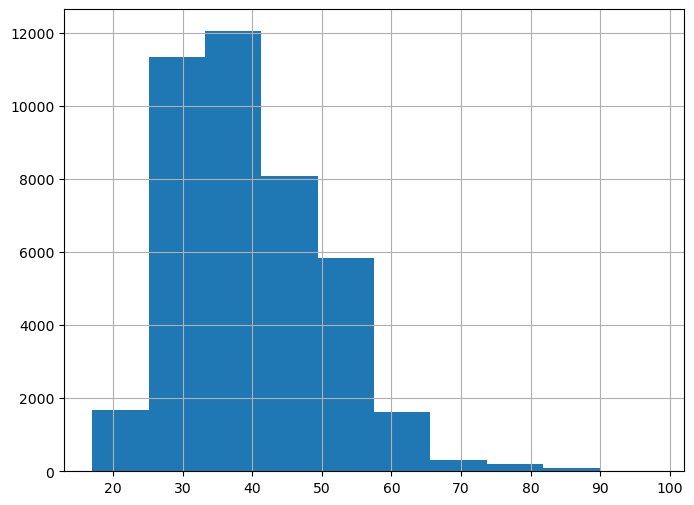

In [6]:
df["age"].hist()

##### The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.

###  Plot function

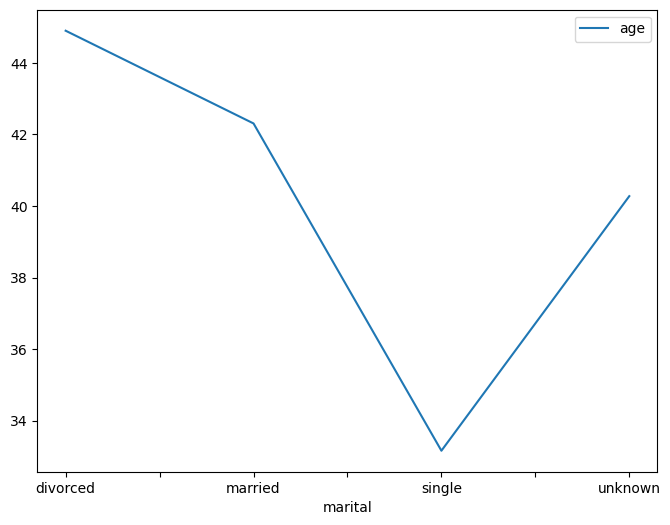

In [10]:
df[["age", "marital"]].groupby(
    "marital"
).mean().plot();

##### Plot function The plot shows that the average age of unmarried clients is significantly lower than that of the other clients.

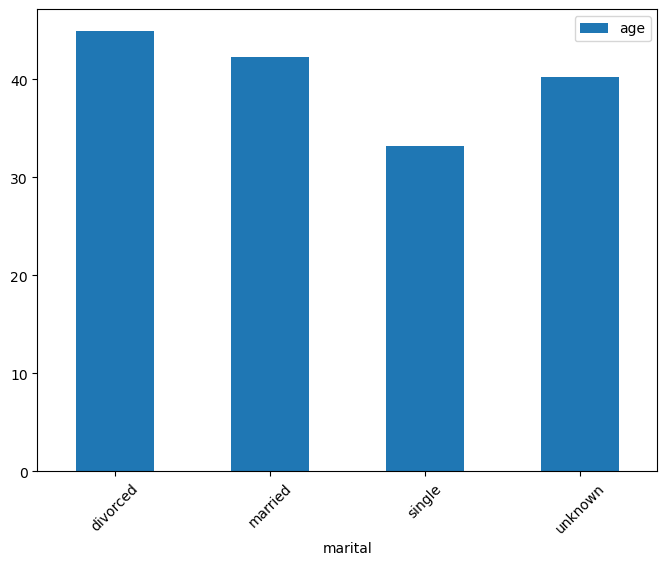

In [13]:
df[["age", "marital"]].groupby(
    "marital"
).mean().plot(kind="bar", rot=45);

##### This visualization will help us to look at one picture as at interconnection of various features.

### Pair Plot

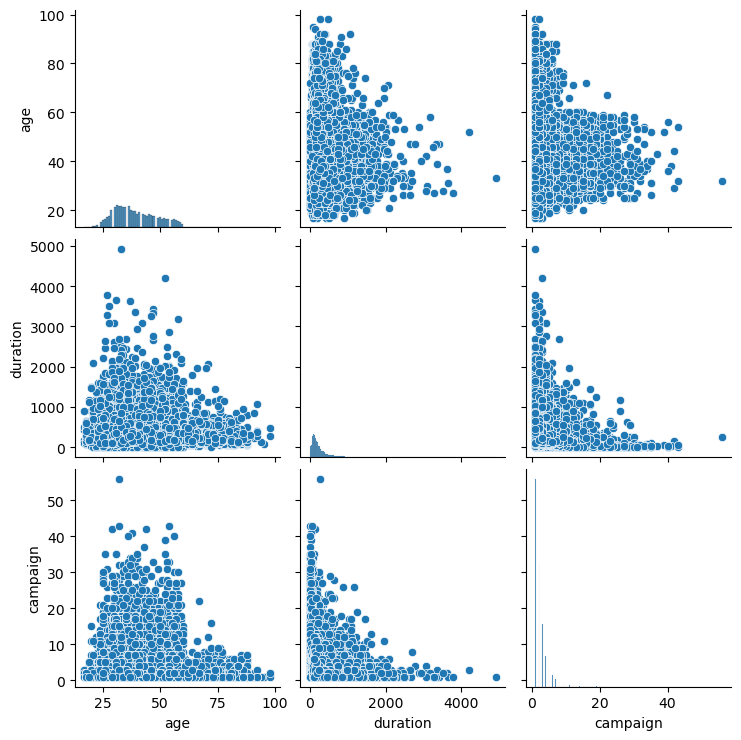

In [15]:
sns.pairplot(
    df[["age", "duration", "campaign"]]
);

##### This visualization allows us to identify an interesting inverse relationship between a campaign and duration, which indicates a decrease in the duration of contact with the client with an increase in their contact quantity during the campaign.

### Dist_plot

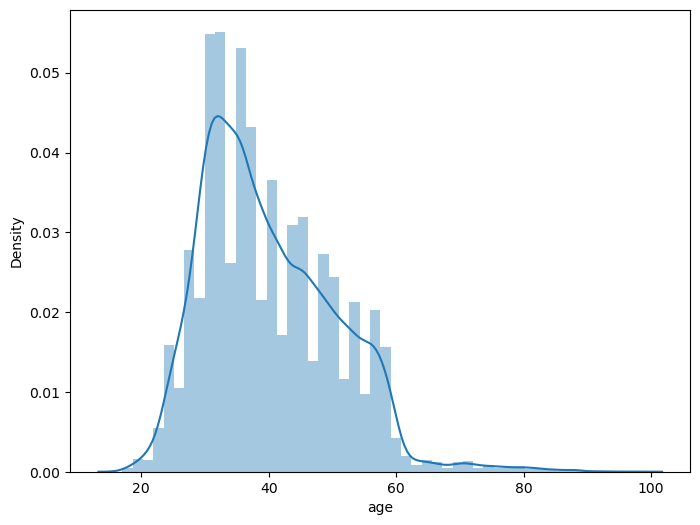

In [16]:
sns.distplot(df.age);

### Joint_plot

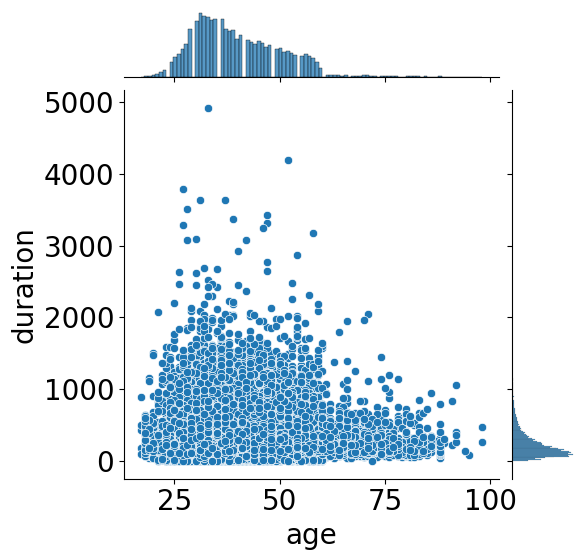

In [84]:
sns.jointplot(x="age", y="duration", data=df, kind="scatter")

##### In order to look more for the relationship between two numerical features, there is also `joint_plot` - this is a hybrid Scatter Plot and Histogram . Let's look at the relationship between the number of contacts in a campaign and the last contact duration.


### Box_plot

<Axes: xlabel='age', ylabel='job'>

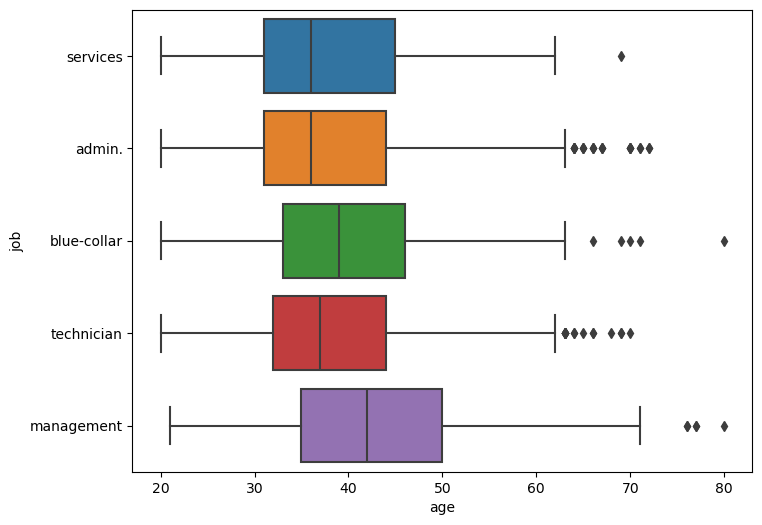

In [21]:
top_jobs = (
    df.job.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="job", x="age", data=df[df.job.isin(top_jobs)], orient="h"
)

##### The plot shows that among the top-5 client categories by the type of employment, the most senior customers represent the management, and the largest number of outliers is among the categories of admin. and technician.

### Plotly

In [25]:
age_df = (
    df.groupby("age")[["y"]]
    .sum()
    .join(df.groupby("age")[["y"]].count(), rsuffix='_count')
)
age_df.columns = ["Attracted", "Total Number"]

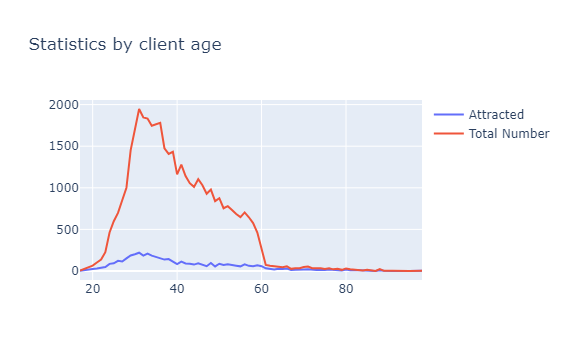

In [27]:
trace0 = go.Scatter(x=age_df.index, y=age_df["Attracted"], name="Attracted")
trace1 = go.Scatter(x=age_df.index, y=age_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Statistics by client age"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

##### In Plotly, we create the Figure object, which consists of data and design/style, for which the object Layout was created. In simple cases, you can call the function iplot just for the traces list.

### Bar_chart.

In [28]:
month_index = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
month_df = (
    df.groupby("month")[["y"]]
    .sum()
    .join(df.groupby("month")[["y"]].count(), rsuffix='_count')
).reindex(month_index)
month_df.columns = ["Attracted", "Total Number"]

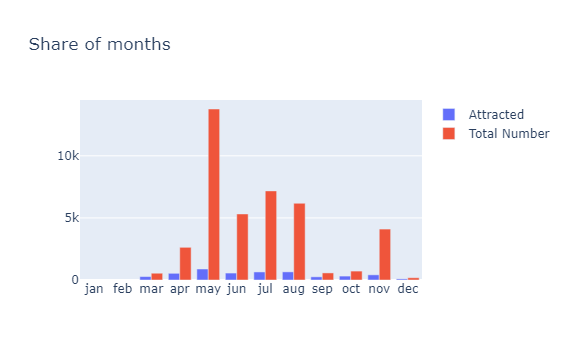

In [31]:
trace0 = go.Bar(x=month_df.index, y=month_df["Attracted"], name="Attracted")
trace1 = go.Bar(x=month_df.index, y=month_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Share of months"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

#####  The distribution of customers by months, designed by the number of attracted clients and on the total number of clients. 

### Box_plot

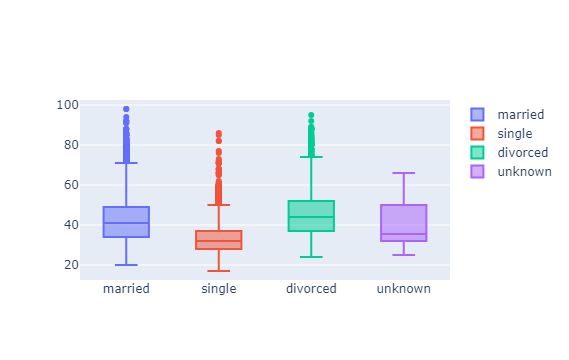

In [33]:
data = []

for status in df.marital.unique():
    data.append(go.Box(y=df[df.marital == status].age, name=status))
iplot(data, show_link=False)

##### The differences in the client age depending on the family status.

### Numerical features

##### For the analysis of numerical features, a histogram and a box plot are most often used.

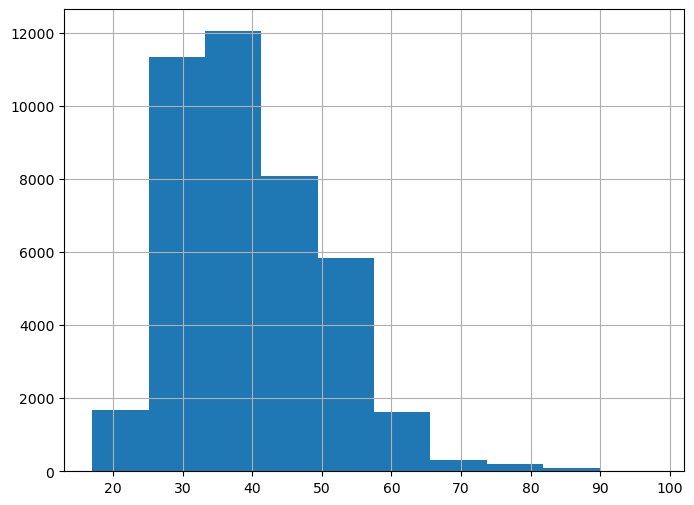

In [34]:
df["age"].hist();

##### Building a box plot for the cons.price.idx feature with sns.boxplot function

<Axes: >

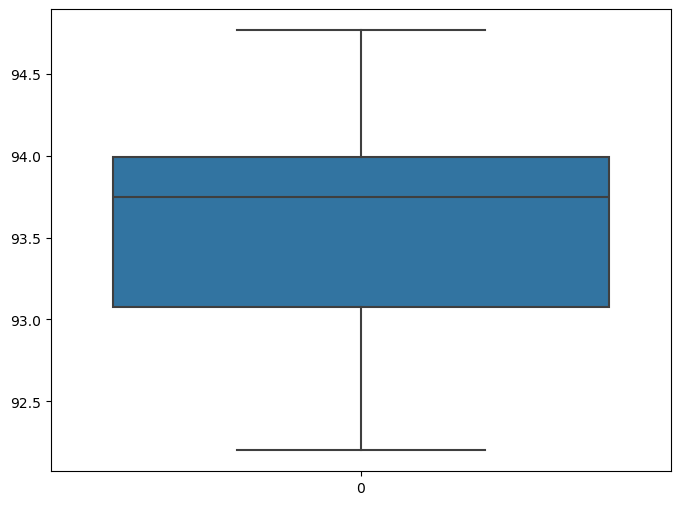

In [46]:
sns.boxplot(df["cons.price.idx"])

### Categorical features

##### The client distribution of marital status.


In [47]:
df["marital"].value_counts().head()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

##### The client distribution on the fact of their involvement for signing a deposit as well.

In [48]:
df["y"].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

### Numerical features

array([[<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>],
       [<Axes: title={'center': 'euribor3m'}>,
        <Axes: title={'center': 'nr.employed'}>]], dtype=object)

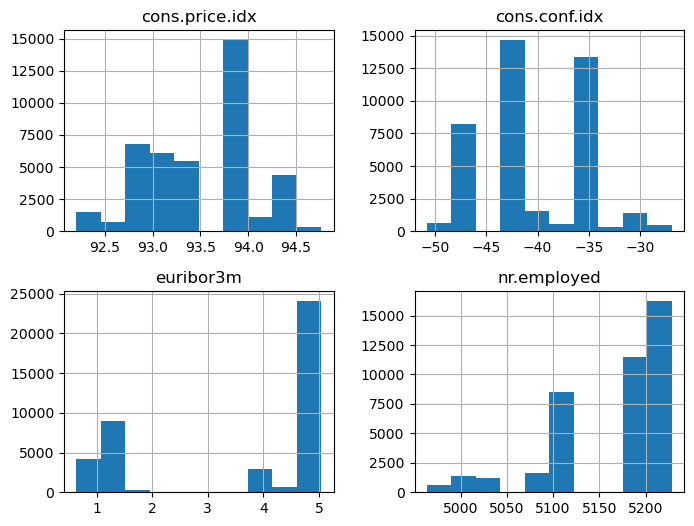

In [51]:
feat = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

df[feat].hist()

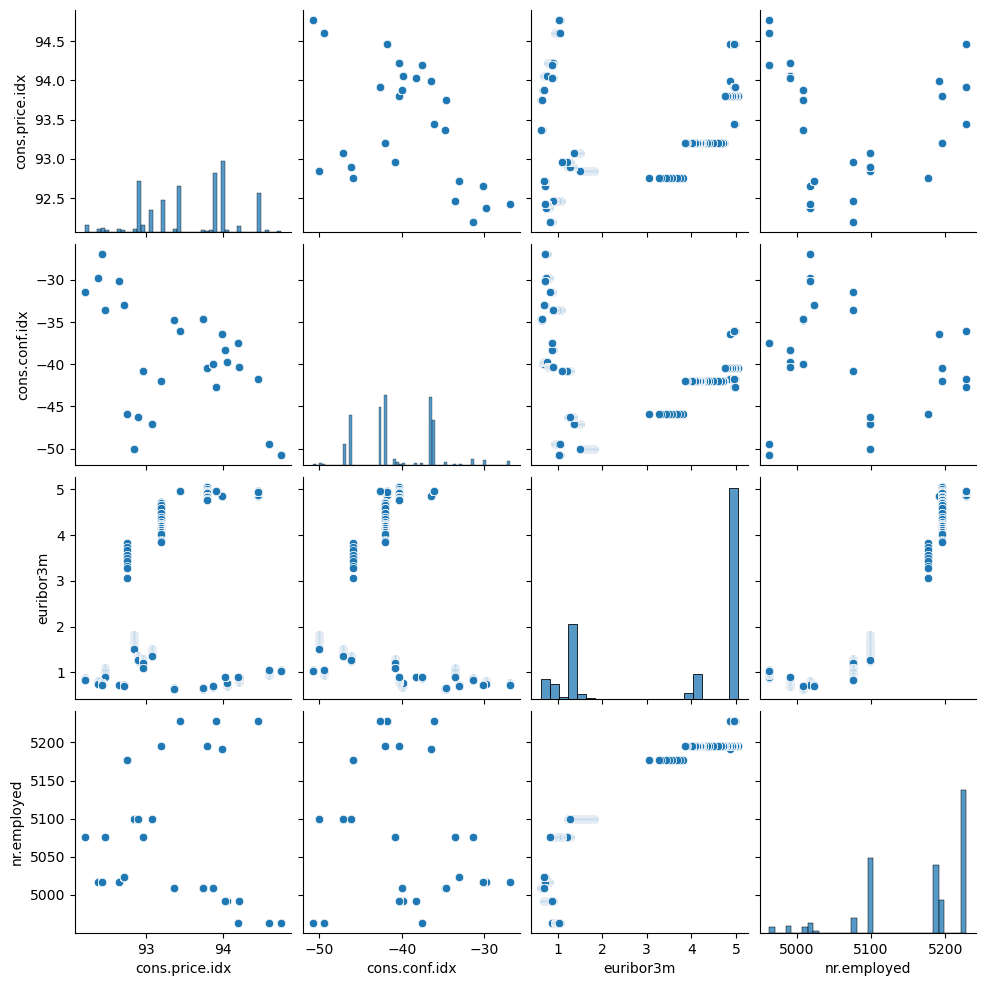

In [52]:
sns.pairplot(df[feat])

##### Building a pair plot set for the feat list with sns.pairplot function.

### Heat_map

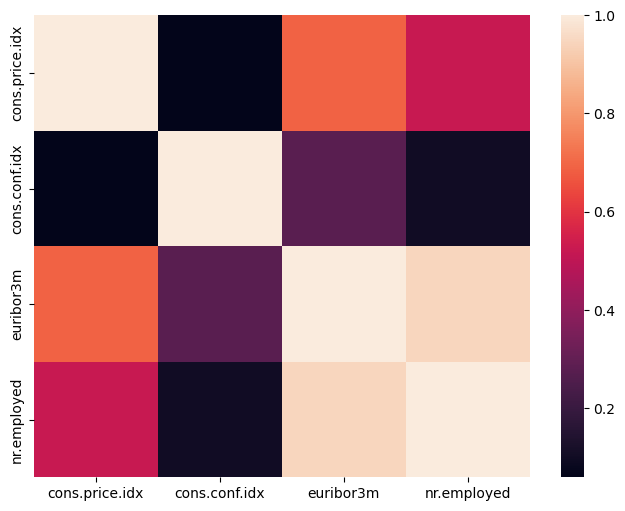

In [53]:
sns.heatmap(df[feat].corr());

##### Build a Heat Map for the economy macro indicators correlation matrix.

### Numerical and categorical features

##### boxplot and violinplot are used for visual analysis of the numerical and categorical features.

Let's look at the age feature box plot by the target feature.

<Axes: xlabel='y', ylabel='age'>

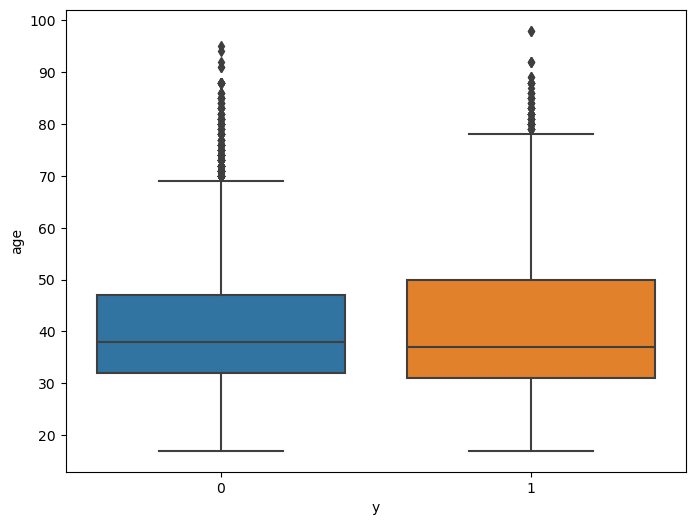

In [55]:
sns.boxplot(x="y", y="age", data=df)

<Axes: xlabel='marital', ylabel='age'>

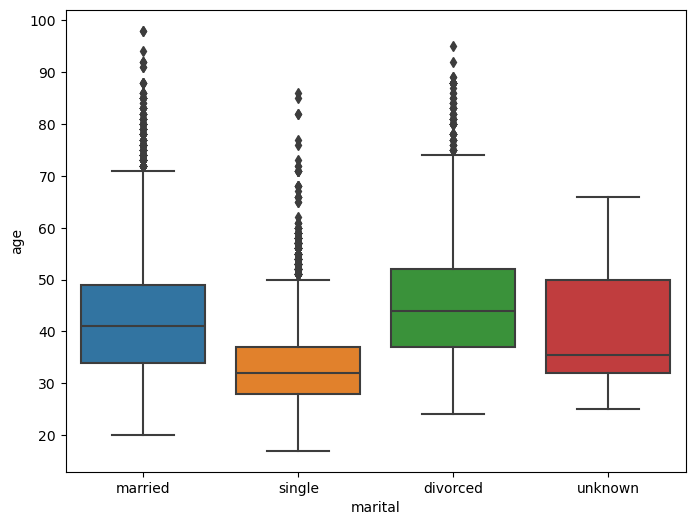

In [57]:
sns.boxplot(x="marital", y="age", data=df)

Building the box plot for the marital feature with sns.boxplot function.

### Violin_plot

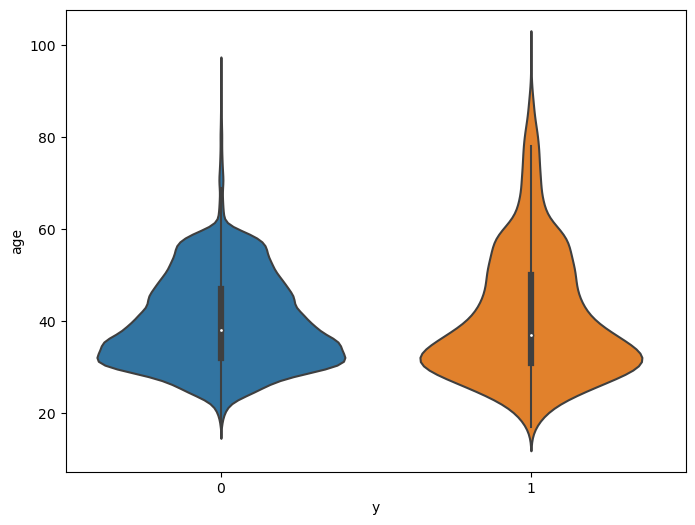

In [59]:
sns.violinplot(x="y", y="age", data=df);

Plot the client age distribution across the target feature.

In [60]:
df.groupby("housing")["age"].mean()

housing
no         40.044195
unknown    39.951515
yes        40.010011
Name: age, dtype: float64

 Calculating the mean client for the grouping by the housing feature values

<Axes: xlabel='housing', ylabel='age'>

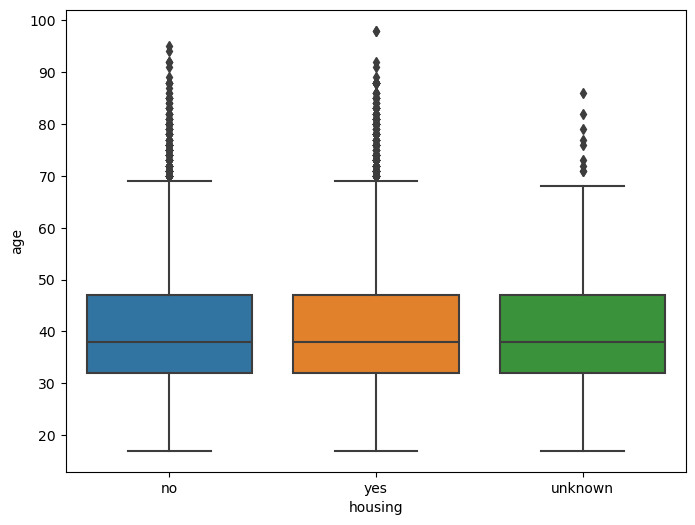

In [62]:
sns.boxplot(x="housing", y="age", data=df)

Building a box plot for the age feature by the housing values with sns.boxplot function.

### Categorical features

In [63]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


AttributeError: 'numpy.int64' object has no attribute 'startswith'

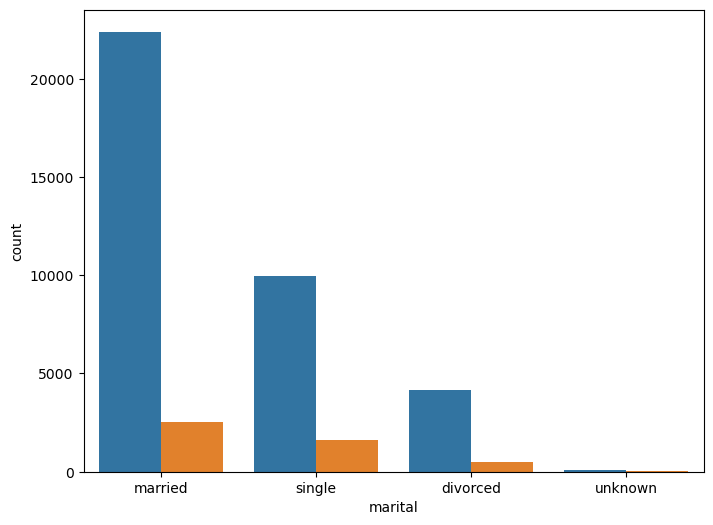

In [64]:
sns.countplot(x="marital", hue="y", data=df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

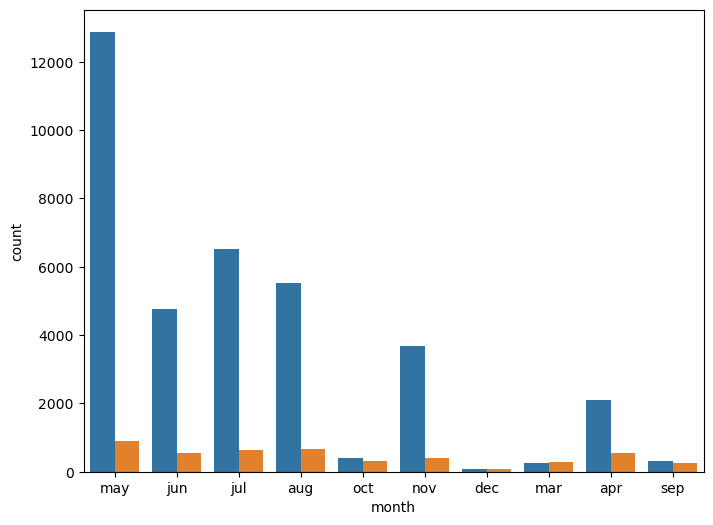

In [65]:
sns.countplot(x="month", hue="y", data=df)

### Comprehensive visual analysis of the source banking dataset

Creating the categorical and numerical lists for the correspondent dataset features.

Let's look at the distribution of numerical features with hist function.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

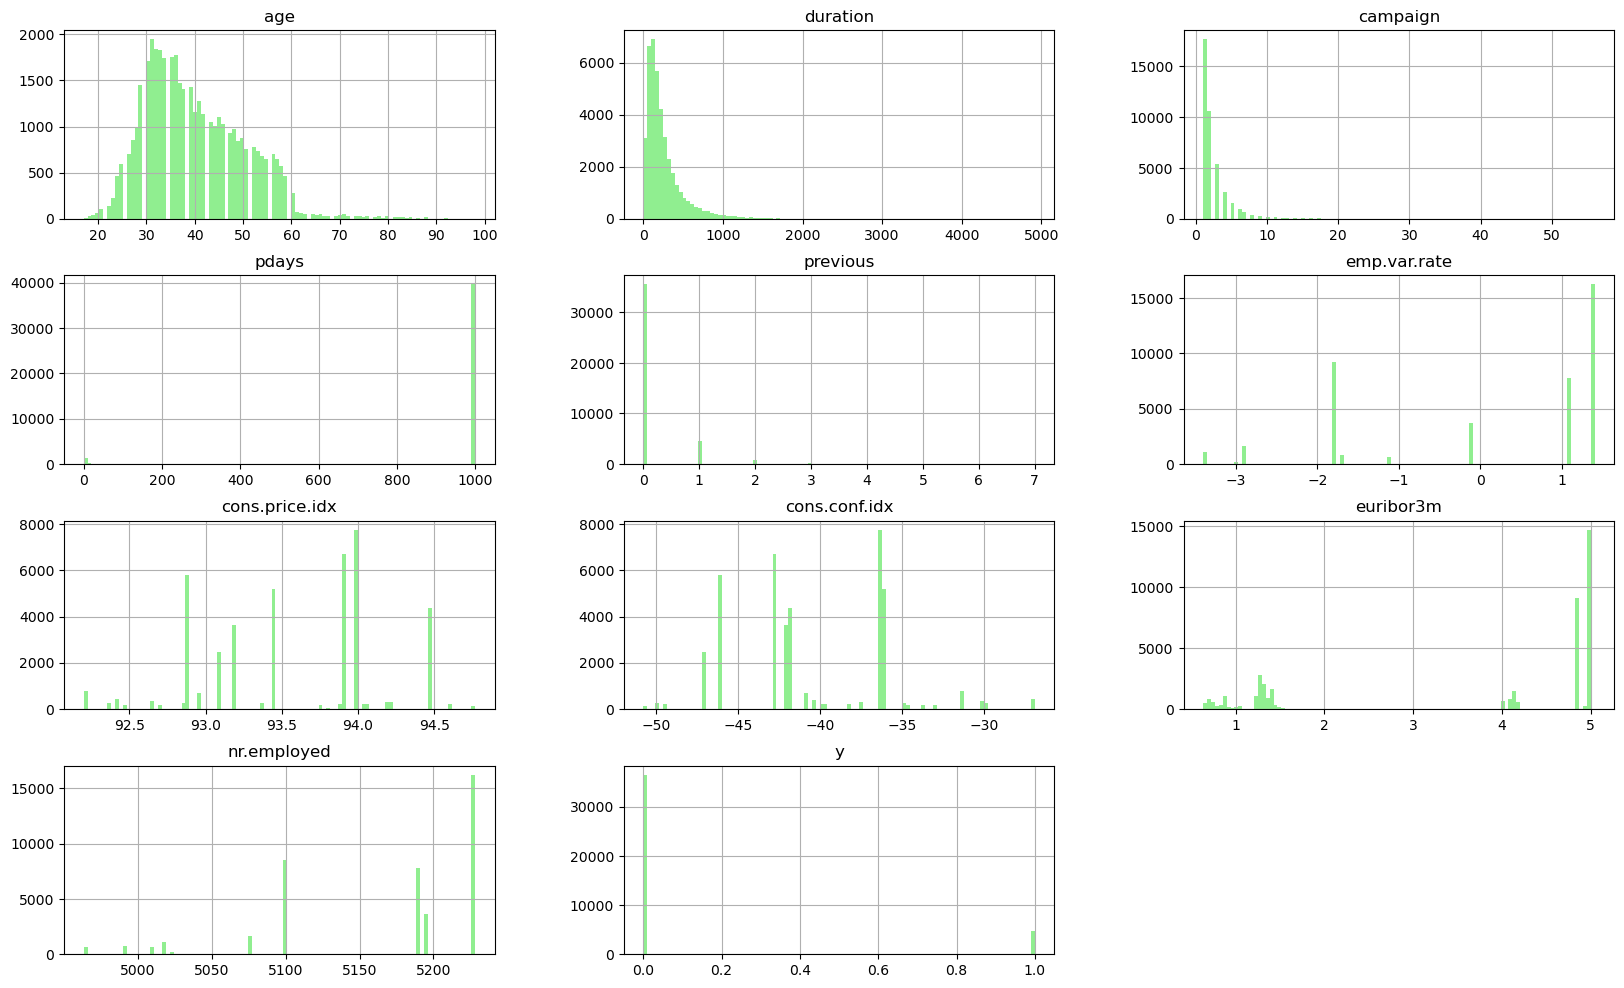

In [68]:
categorical = []
numerical = []
for feature in df.columns:
    if df[feature].dtype == object:
        categorical.append(feature)
    else:
        numerical.append(feature)

df[numerical].hist(figsize=(20,12), bins=100, color='lightgreen')

From the histograms, we see that for each numerical feature there is one or more dominant segments of values​, that is why we got pronounced peaks.

In addition, we see that the target feature is unbalanced. The number of positive outcomes is significantly lower than negative, which is quite natural for telephone marketing. As a result, the problem arises with the fact that many methods are sensitive to the imbalance of features. We will try to solve this problem later.

Next, let's look at the categorical features.

In [70]:
df.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


Visualize the categorical features with bar plots.

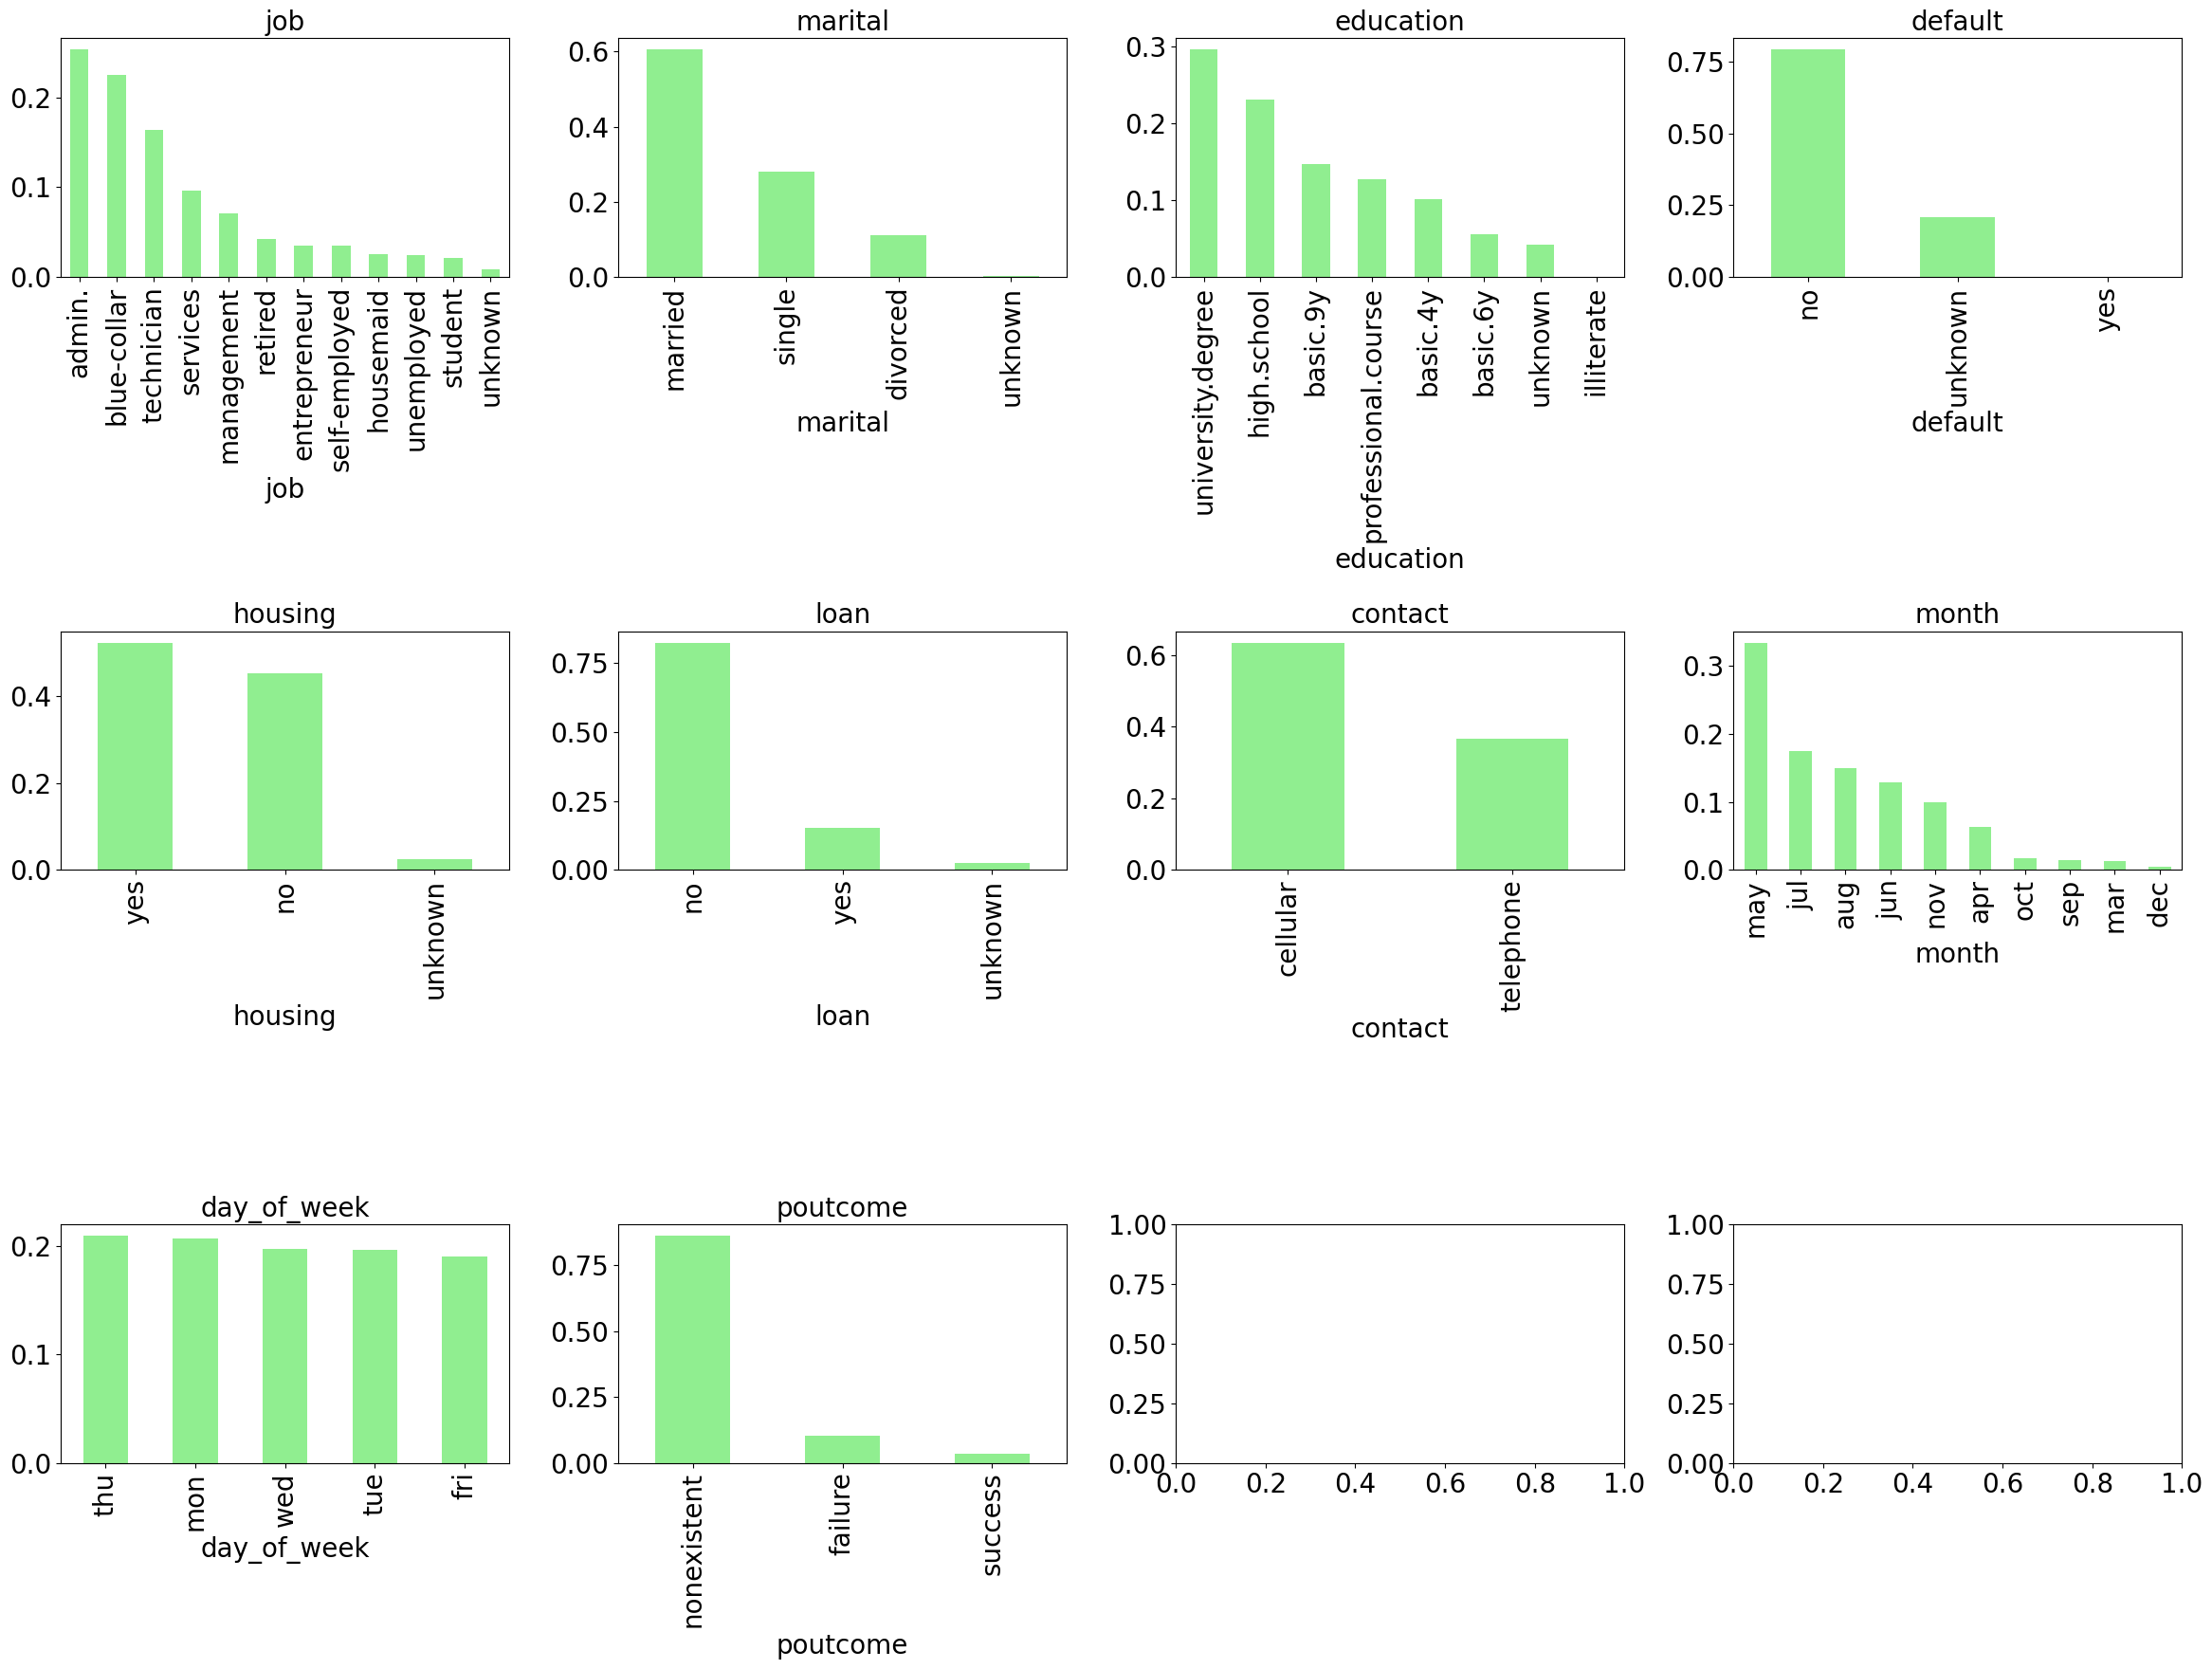

In [73]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20

fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    df[categorical[i]].value_counts(normalize=True).plot(kind='bar', label=categorical[i], ax=axes[i//4, i%4], color='lightgreen')
    axes[i//4, i%4].set_title(categorical[i])
plt.tight_layout()

Let's look at the visualized dependences of numerical features from the target feature with scatter plots.

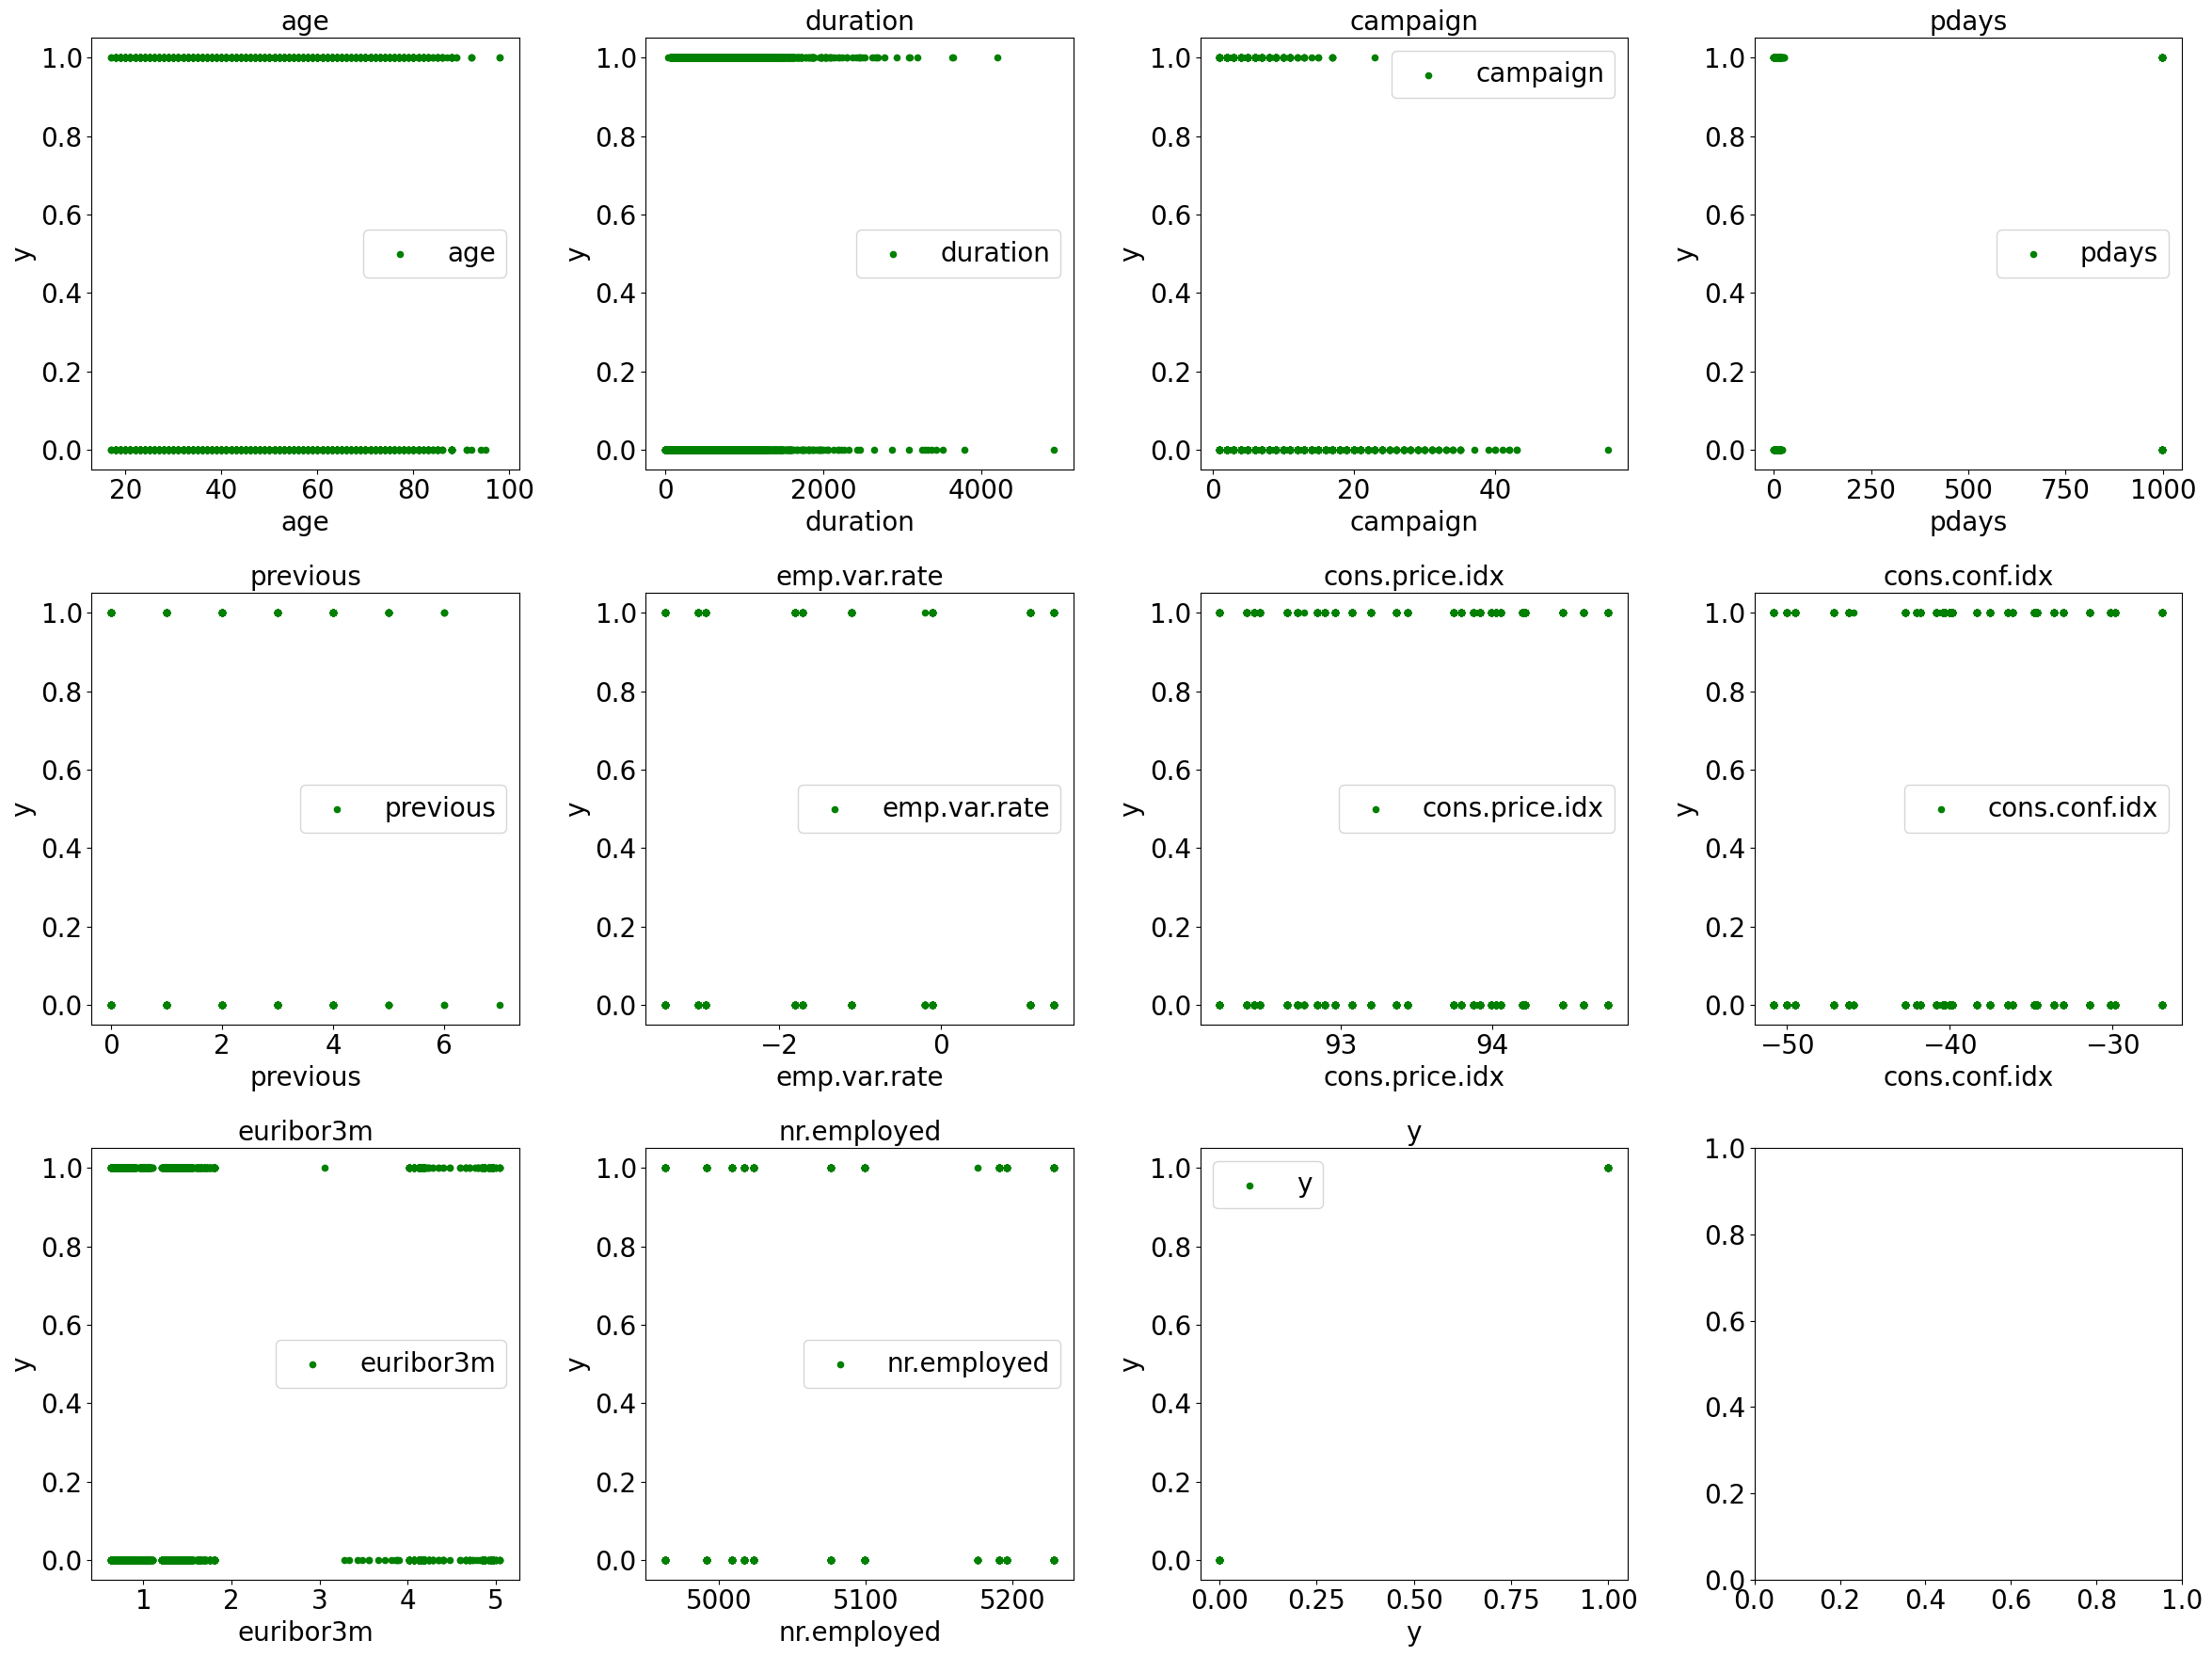

In [76]:

fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(numerical)):
    df.plot(x=numerical[i], y = 'y', label=numerical[i], ax=axes[i//4, i%4], kind='scatter', color='green')
    axes[i//4, i%4].set_title(numerical[i])
plt.tight_layout()

Let's compare the age of customers for the top 3 of the most common levels of education using a box plot.

<Axes: xlabel='age', ylabel='education'>

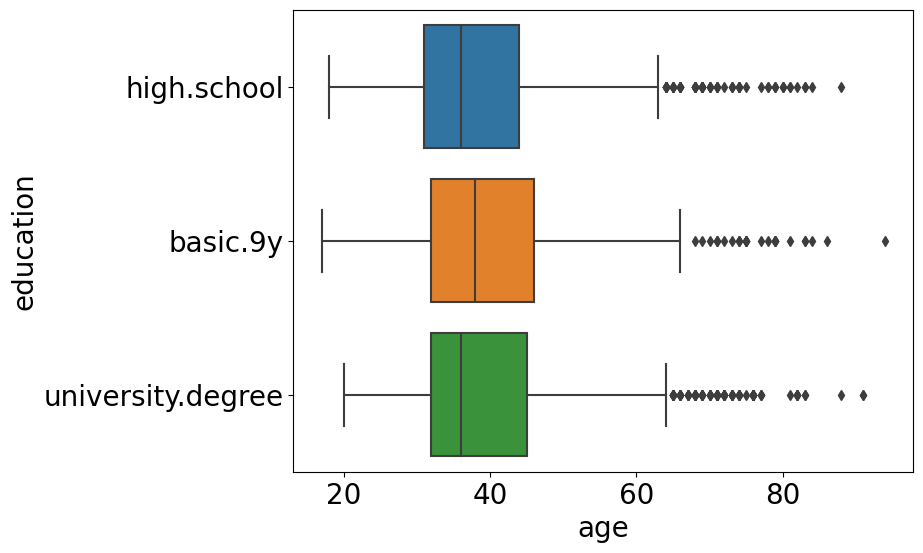

In [78]:
top_3 = (
    df.education.value_counts().sort_values(ascending=False).head(3).index.values
)
sns.boxplot(
    y="education", x="age", data=df[df.education.isin(top_3)], orient="h"
)

We visualize the distribution of positive target responses by groups:

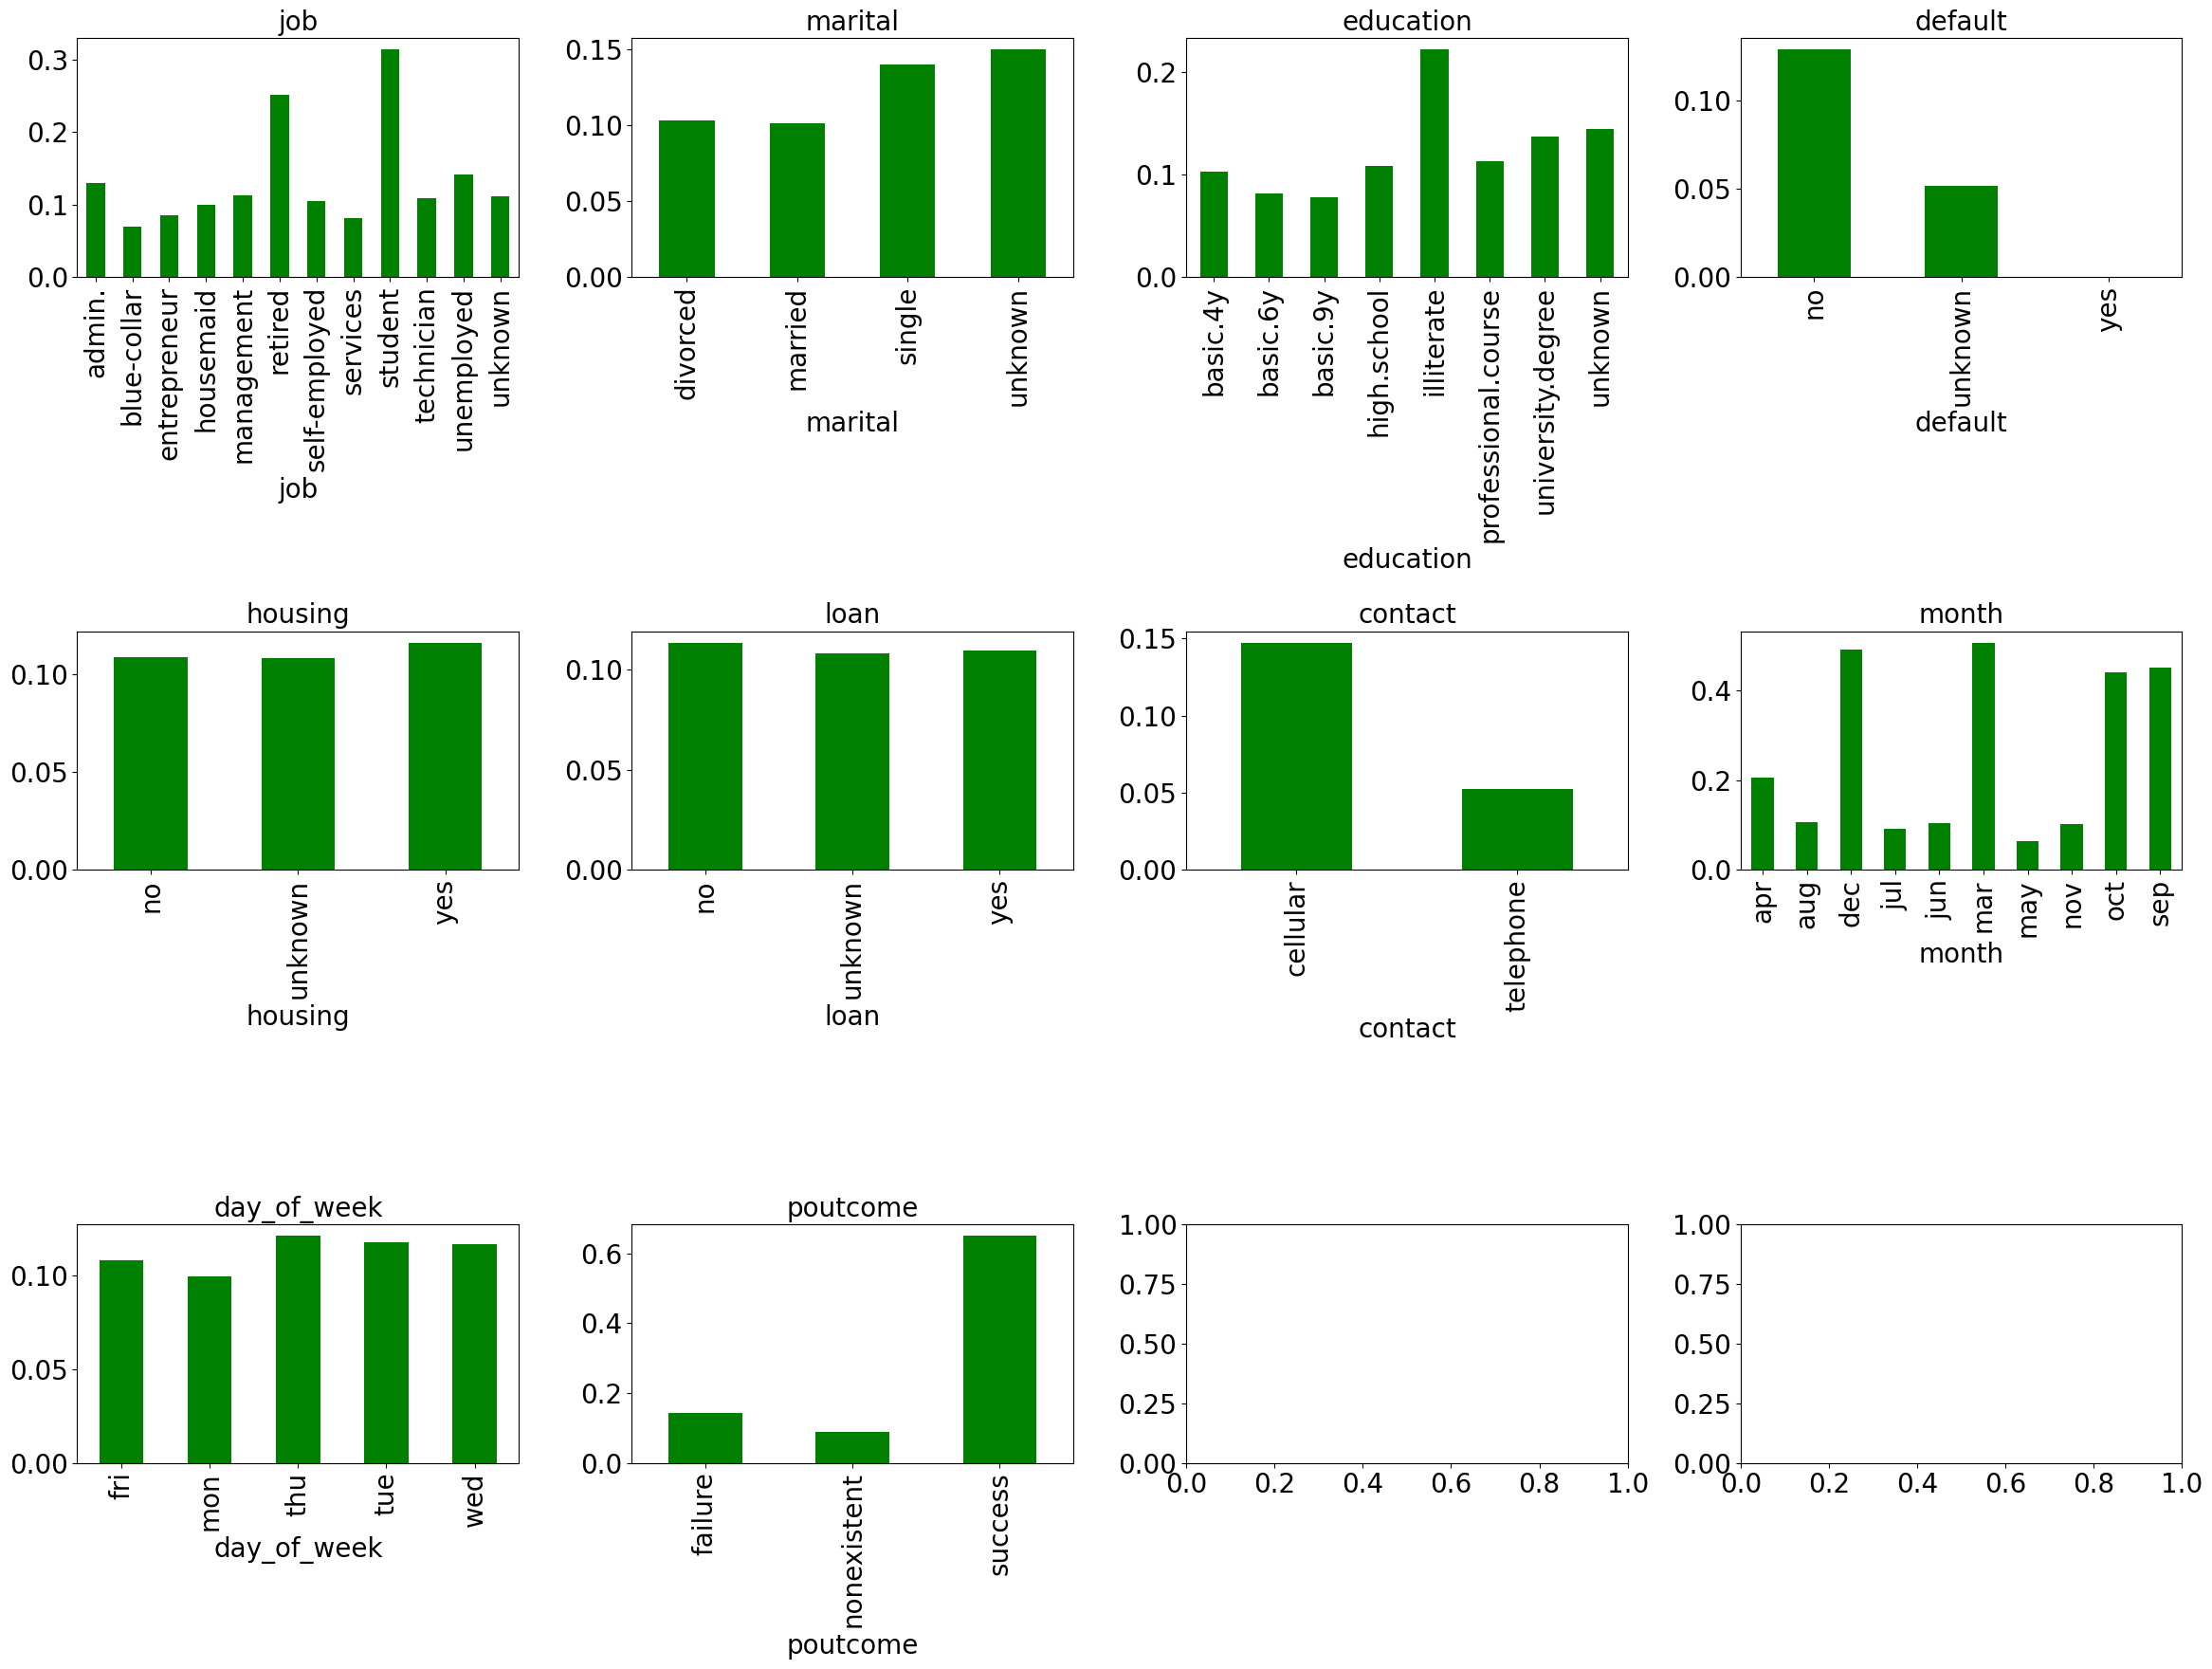

In [82]:
fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    df.groupby(categorical[i])['y'].mean().plot(kind='bar', ax=axes[i//4, i%4], color='green')
    axes[i//4, i%4].set_title(categorical[i])

plt.tight_layout()

### Conclusions

Let's look at the visualized dependences of numerical features from the target feature with scatter plots.There are neither any data missing, nor explicit outliers that should be cut. But we can omit `housing`, `loan` and `day_of_week` features in the next steps. 
   
The `euribor3m` and `nr.employed` features strongly correlate with `emp.var.rate`. Let me remind you that `emp.var.rate` - Employment Variation Rate is a quarterly indicator, `euribor3m` - euribor 3 month rate is a day indicator, and `nr.employed` - number of employees is a quarterly indicator. The correlation of the employment change with the number of employed issues itself is obvious, but its correlation with EURIBOR (Euro Interbank Offered Rate, the European interbank offer rate) is interesting. This indicator is based on the average interbank interest rates in Eurozone. It also has a positive effect since the higher the interest rate is, the more willingly customers will spend their money on financial tools.

Therefore, if banks want to improve their lead generation, what they should do is to improve the quality of phone conversations and run their campaigns when interest rates are high and the macroeconomic environment is stable. 
